Link to dataset: https://www.kaggle.com/datasets/asaniczka/uk-optimal-product-price-prediction/

Part 1: Analyzing Best-Seller Trends Across Product Categories
    
Objective: Understand the relationship between product categories and their best-seller status.

Crosstab Analysis:

Create a crosstab between the product category and the isBestSeller status.

Are there categories where being a best-seller is more prevalent?

Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.



In [1]:
import pandas as pd
df = pd.read_csv('amz_uk_price_prediction_dataset.csv')

In [2]:
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [3]:
category_crosstab = pd.crosstab(df['category'],df['isBestSeller'])

In [4]:
category_crosstab

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [17]:
category_crosstab = category_crosstab.sort_values(by=True,ascending=False)

Statistical Tests:

Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.

Compute Cramér's V to understand the strength of association between best-seller status and category.

In [18]:
from scipy.stats import chi2_contingency


chi2_statistic, chi2_p_value, _, _ = chi2_contingency(category_crosstab)

chi2_statistic, chi2_p_value

(36540.202700613874, 0.0)

In [19]:
from scipy.stats.contingency import association

association(category_crosstab, method="cramer")

0.12228294397605641

Visualizations:

Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

<Axes: xlabel='category'>

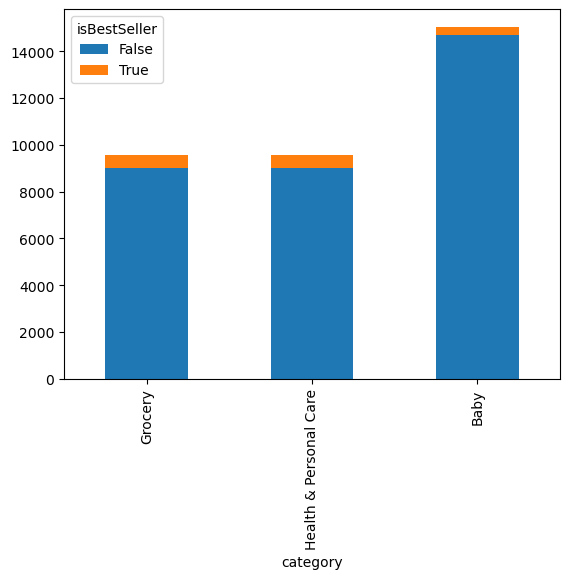

In [20]:
category_crosstab.head(3).plot(kind="bar", stacked=True)

Part 2: Exploring Product Prices and Ratings Across Categories and Brands

Objective: Investigate how different product categories influence product prices.

Preliminary Step: Remove outliers in product prices.

For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.

Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.



In [32]:
def tukeys_test_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify the outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    return outliers

def tukeys_test_outliers_filter(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify the outliers
    return (data < lower_bound) | (data > upper_bound)

In [33]:
df.loc[~df['price'].isin(tukeys_test_outliers(df['price']))]
df_no_outliers = df.loc[~tukeys_test_outliers_filter(df['price'])]

Violin Plots:

Use a violin plot to visualize the distribution of price across different product categories. Filter out the top 20 categories based on count for better visualization.

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
filtered_categories = df['category'].value_counts().head(10).index
filtered_categories

Index(['Sports & Outdoors', 'Beauty', 'Handmade Clothing, Shoes & Accessories',
       'Bath & Body', 'Birthday Gifts', 'Manicure & Pedicure Products',
       'Skin Care', 'Make-up', 'Hair Care', 'Fragrances'],
      dtype='object', name='category')

/Users/samielzengotita/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


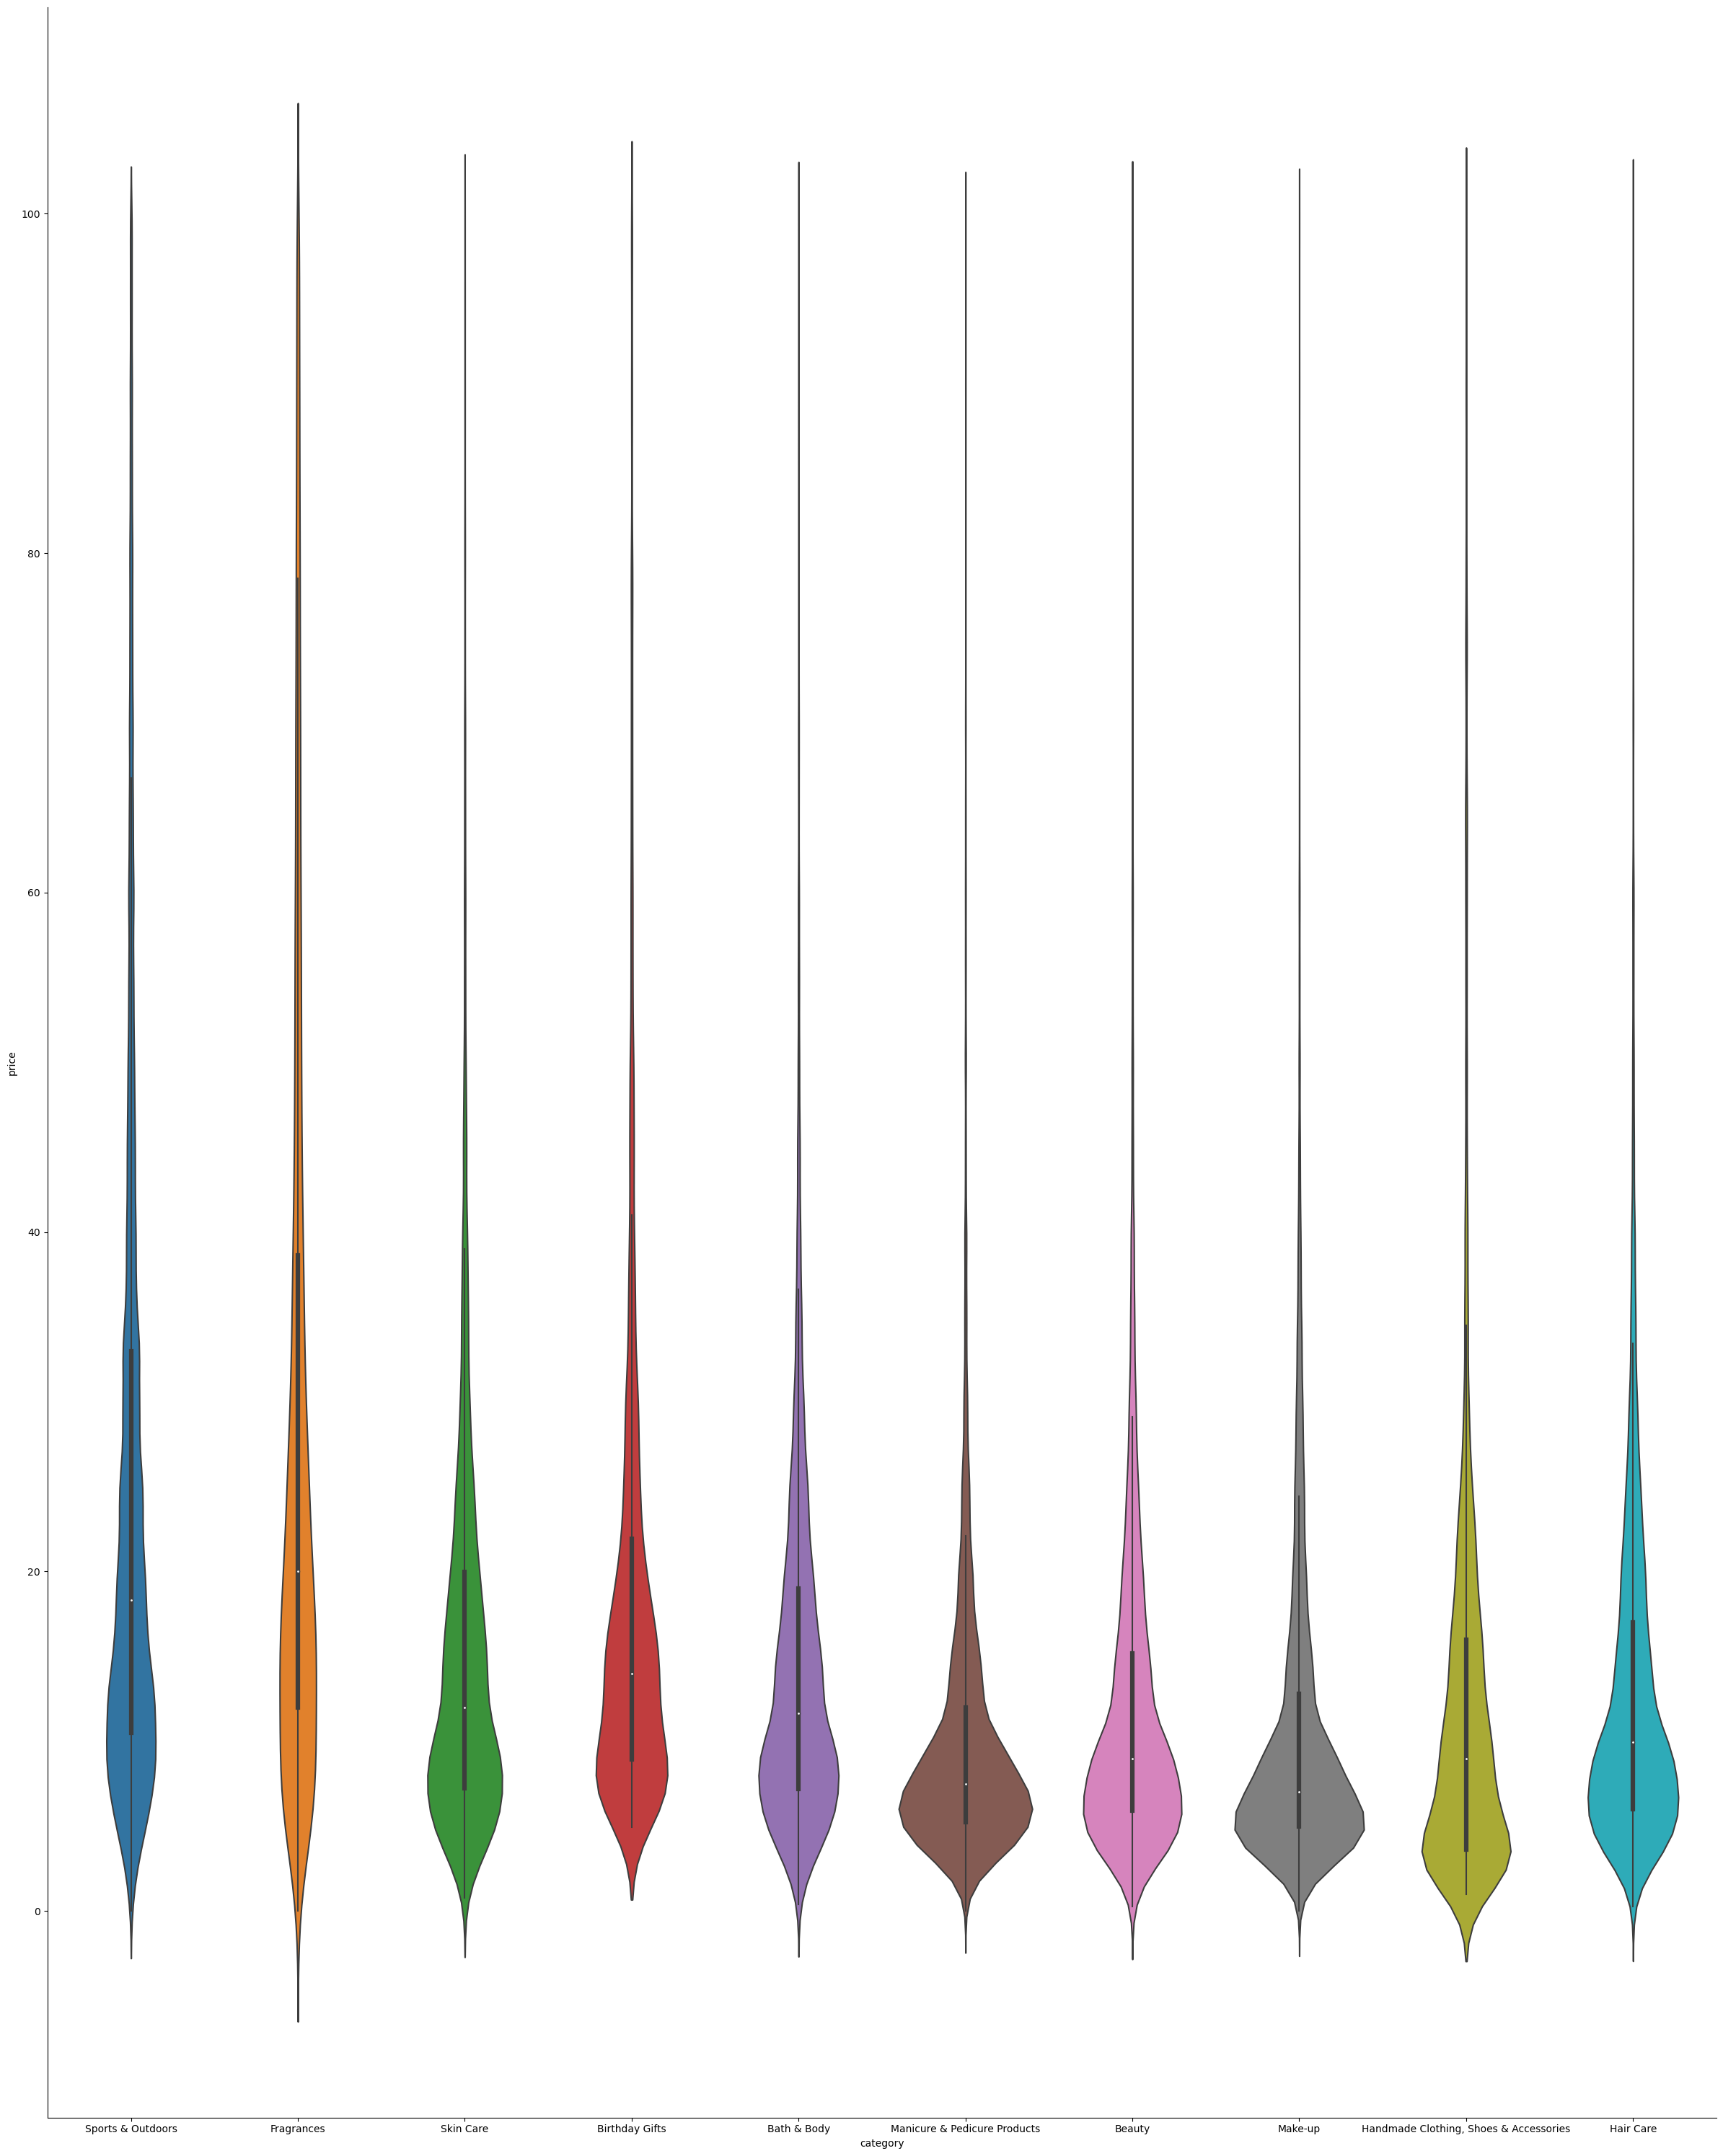

In [49]:
sns.catplot(data=df_no_outliers.loc[df_no_outliers['category'].isin(filtered_categories)],x='category',y='price',kind='violin',height=30,
           aspect=0.8)

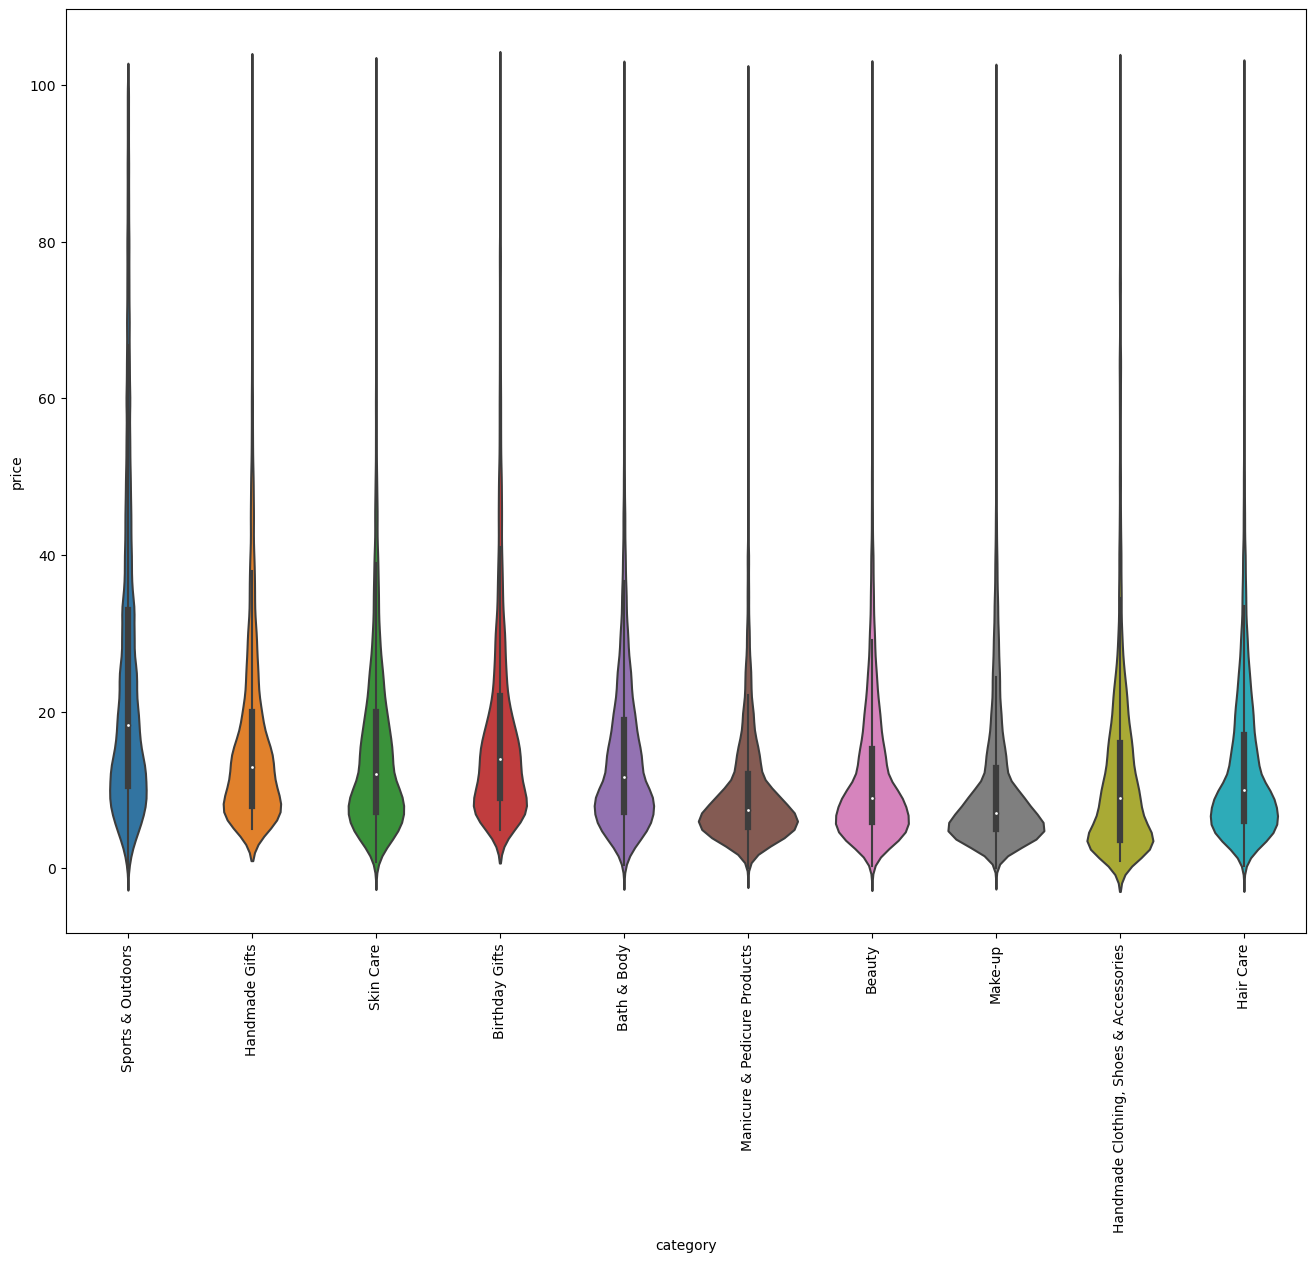

In [50]:
top_categories = df_no_outliers['category'].value_counts().head(10).index
df_filtered = df_no_outliers[df_no_outliers['category'].isin(top_categories)]

plt.figure(figsize=(16, 12))
sns.violinplot(x='category', y='price', data=df_filtered)
plt.xticks(rotation=90);

Which product category tends to have the highest median price? Don't filter here by top categories.

In [52]:
df_no_outliers.groupby('category')['price'].median().sort_values(ascending=False).head(10)

category
Desktop PCs               74.00
Boxing Shoes              69.79
Tablets                   69.00
Graphics Cards            68.54
Motherboards              67.92
Made in Italy Handmade    64.00
Digital Frames            63.90
Streaming Clients         62.68
Golf Shoes                62.39
Ski Helmets               61.33
Name: price, dtype: float64

Bar Charts:

Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
Which product category commands the highest average price? Don't filter here by top categories.

/Users/samielzengotita/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


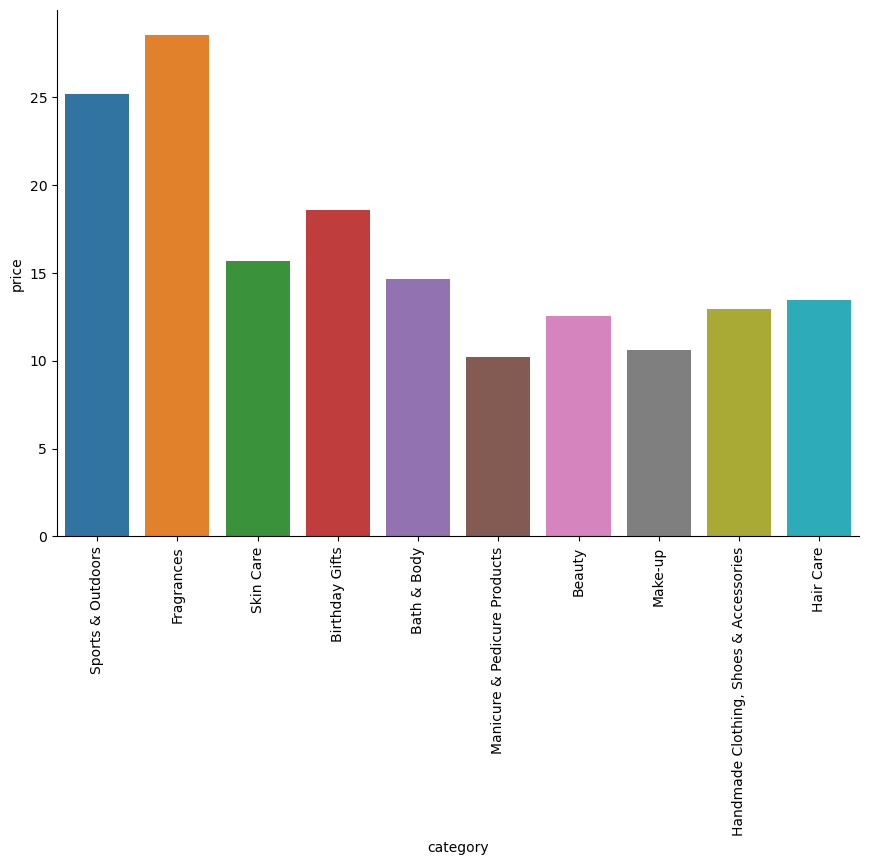

In [54]:
filtered_categories = df['category'].value_counts().head(10).index
filtered_categories
sns.catplot(data=df_no_outliers.loc[df_no_outliers['category'].isin(filtered_categories)],x='category',y='price',
            kind='bar',  height=6,  aspect=1.5,errorbar=None,)
plt.xticks(rotation=90);

In [55]:
df_no_outliers.groupby('category')['price'].mean().sort_values(ascending=False)

category
Motherboards             68.772432
Boxing Shoes             67.417803
Desktop PCs              66.915562
Tablets                  66.552971
Graphics Cards           65.103509
                           ...    
Bedding Accessories       8.835220
Adapters                  8.750197
Signs & Plaques           8.210513
Arts & Crafts             8.006540
Office Paper Products     6.876369
Name: price, Length: 296, dtype: float64

Box Plots:

Visualize the distribution of product ratings based on their category using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.

Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

/Users/samielzengotita/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


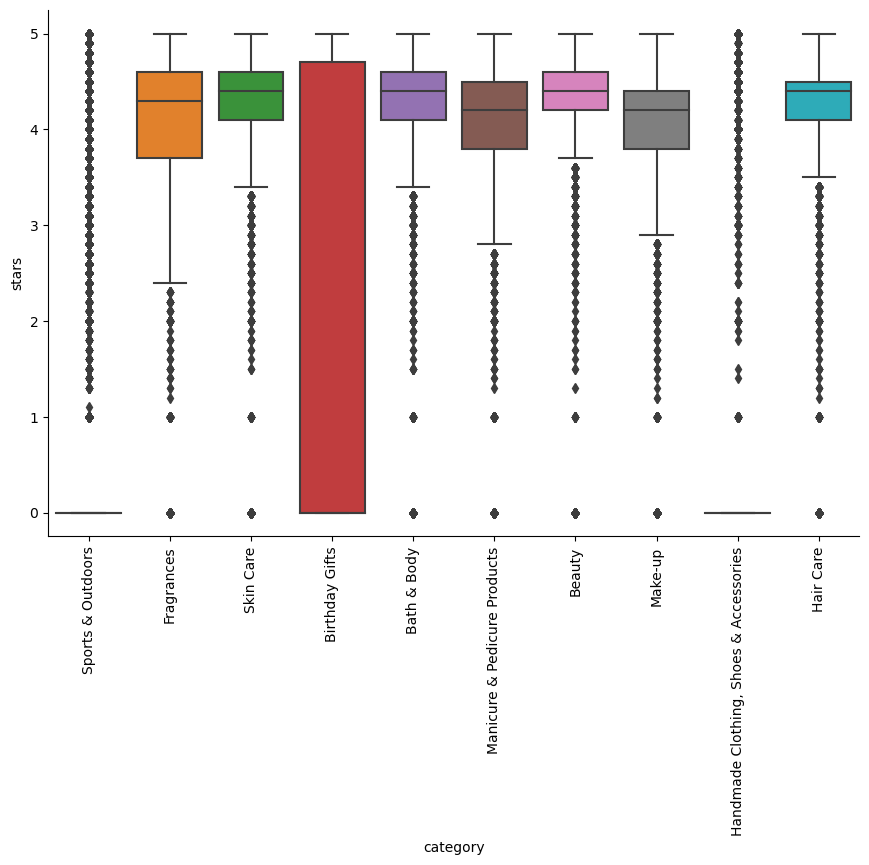

In [57]:
filtered_categories = df['category'].value_counts().head(10).index
filtered_categories
sns.catplot(data=df_no_outliers.loc[df_no_outliers['category'].isin(filtered_categories)],x='category',y='stars',
            kind='box',  height=6,  aspect=1.5)
plt.xticks(rotation=90);

In [58]:
df.groupby('category')['stars'].median().sort_values(ascending=False)

category
Computer Memory                4.7
Hobbies                        4.6
Beer, Wine & Spirits           4.6
Laptop Accessories             4.6
Kids' Play Figures             4.6
                              ... 
KVM Switches                   0.0
Karaoke Equipment              0.0
Lab & Scientific Products      0.0
Laptops                        0.0
eBook Readers & Accessories    0.0
Name: stars, Length: 296, dtype: float64

Part 3: Investigating the Interplay Between Product Prices and Ratings

Objective: Analyze how product ratings (stars) correlate with product prices.

Correlation Coefficients:

Calculate the correlation coefficient between price and stars.

Is there a significant correlation between product price and its rating?

In [59]:
df['price'].corr(df['stars'])

-0.1249067326214869

In [60]:
df[['price','stars']].corr()

,price,stars
price,1.000000,-0.124907
stars,-0.124907,1.000000


Visualizations:

Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?

Use a correlation heatmap to visualize correlations between all numerical variables.

Examine if product prices typically follow a normal distribution using a QQ plot.

<Axes: xlabel='stars', ylabel='price'>

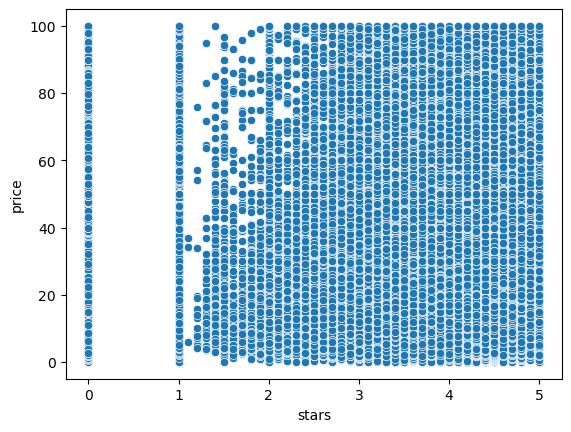

In [61]:
sns.scatterplot(data=df_no_outliers,x='stars',y='price')

<Axes: >

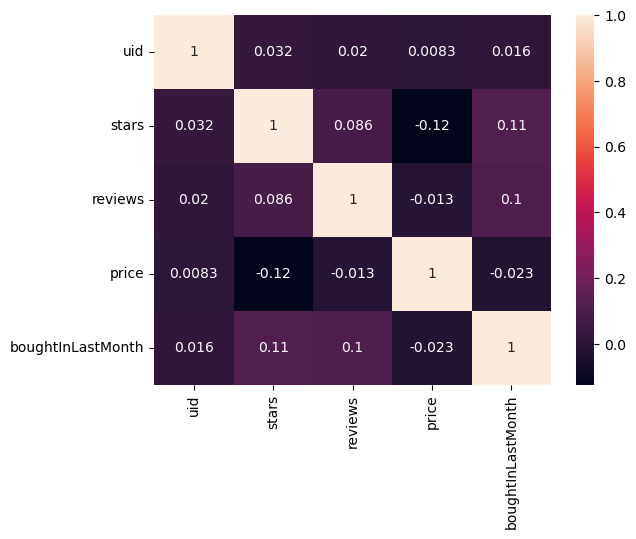

In [62]:
sns.heatmap(df.select_dtypes('number').corr(),annot=True)

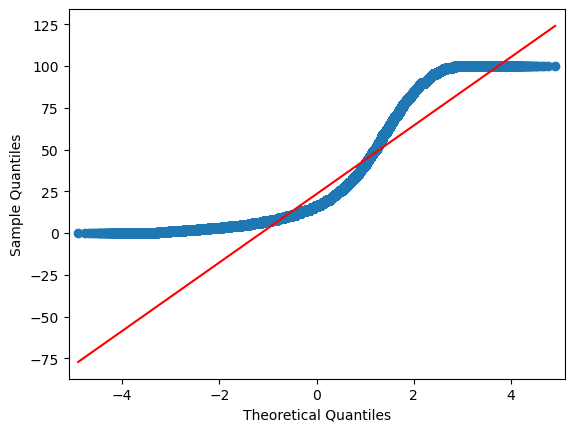

In [64]:
import statsmodels.api as sm

sm.qqplot(df_no_outliers['price'], line='s');